<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MINT-Fächer-in-der-Familie" data-toc-modified-id="MINT-Fächer-in-der-Familie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MINT-Fächer in der Familie</a></span><ul class="toc-item"><li><span><a href="#Alle-Studenten" data-toc-modified-id="Alle-Studenten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Alle Studenten</a></span></li><li><span><a href="#Alle-Studenten-mit-Trennung" data-toc-modified-id="Alle-Studenten-mit-Trennung-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Alle Studenten mit Trennung</a></span></li><li><span><a href="#MINT-Studenten" data-toc-modified-id="MINT-Studenten-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>MINT-Studenten</a></span></li><li><span><a href="#Nicht-MINT-Studenten" data-toc-modified-id="Nicht-MINT-Studenten-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Nicht MINT-Studenten</a></span></li><li><span><a href="#Fazit" data-toc-modified-id="Fazit-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fazit</a></span></li></ul></li><li><span><a href="#Familie-vs-Karriere" data-toc-modified-id="Familie-vs-Karriere-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Familie vs Karriere</a></span><ul class="toc-item"><li><span><a href="#Alle-Studentinnen" data-toc-modified-id="Alle-Studentinnen-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Alle Studentinnen</a></span></li><li><span><a href="#Alle-Studentinnen-mit-Trennung" data-toc-modified-id="Alle-Studentinnen-mit-Trennung-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Alle Studentinnen mit Trennung</a></span></li><li><span><a href="#MINT-Studentinnen" data-toc-modified-id="MINT-Studentinnen-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MINT-Studentinnen</a></span></li><li><span><a href="#Nicht-MINT-Studentinnen" data-toc-modified-id="Nicht-MINT-Studentinnen-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Nicht MINT-Studentinnen</a></span></li></ul></li></ul></div>

Hilfsfunktionen & Einstellungen

In [3]:
# for pretty printing
import pprint as pp

# IPython (Jupyter) setting: 
# Print out every value instead of just "last_expr" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt

In [4]:
# Warnungen unterdrücken
import warnings;
warnings.filterwarnings('ignore');

In [5]:
import sqlite3
import pandas as pd
import os.path
dbPath = "database/bachelor_umfrage.db"

def get_poll_data(table_name="selektierte_ergebnisse", where=None):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT * FROM " + table_name
        if where:
            sql += " WHERE " + where
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

poll_df = get_poll_data(table_name="selektierte_ergebnisse")
poll_df = poll_df.drop(columns=['Status'])
poll_df.sample(5)

,AntwortID,Geschlecht,Studiengang,MINTFach,Qualifikation,GeborenAusland,ElternAusland,GeborenDeutschland,MINTStudiumEltern,StudiumEltern,...,Berufsaussichten,Gehalt,AnsehenGesellschaft,FamiliaereGründe,Partner,Kinder,Karriere,MINTGründe,NichtMINTGründe,Verbesserungsvorschläge
181,62534903,Weiblich,Design,nein,fachgebundene Hochschulreife,None,1,None,None,None,...,4,3,2,1,3,1,3,None,Mir fehlte der Ausgleich zwischen kreativer Au...,"Mehr freiere (Gruppen-)Projekte, um Wissen bes..."
384,62591094,Weiblich,Medieninformatik,ja,allgemeine Hochschulreife,None,None,1,None,None,...,None,None,None,None,None,None,None,None,None,None
216,62539088,Weiblich,Nicht aufgeführt,ja,fachgebundene Hochschulreife,None,None,1,None,1,...,4,3,2,1,4,4,3,"Eigenes Interesse durch Praktika und FOS., Tec...",None,"Bachelor Werkstofftechnik mehr Mathe, physik u..."
54,62499656,Weiblich,Angewandte Chemie,ja,allgemeine Hochschulreife,None,None,1,None,None,...,3,3,1,2,4,4,3,None,None,None
318,62578884,Weiblich,Soziale Arbeit,nein,allgemeine Hochschulreife,None,None,1,None,None,...,4,2,3,1,3,3,3,None,None,None


Methode zur Erstellung eines Diagramms anhand eines Dataframes

In [6]:
def txa_plot(df, kind='bar', title=None):
    
    df = df.set_index(df.columns[0])

    if kind=='bar':
        axes = df.plot(kind=kind, figsize=(6, 4), title=title)
        # position legend left out of figure
        # axes.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=1)
    elif kind=='pie':
        axes = df.plot(kind=kind, subplots=True, title=title, autopct='%.1f%%', figsize=(4, 4))
        # position legend left out of figure at top, 1 column
        axes[0].legend(bbox_to_anchor=(1,1), ncol=1)
    else:
        print('Chart type %s not implemented.' % kind)

# MINT-Fächer in der Familie

Im folgenden sollen folgende Fragen beantwortet werden:
- Wie viele Studenten haben Eltern / Geschwister mit MINT-Studium?
- Wie viele Studenten haben Eltern / Geschwister mit MINT-Beruf?
- Wie viele Studenten haben beides?
- Wie viele Studenten haben keins von beiden?

Diese Fragen sollen zunächst für alle Studenten und anschließend für MINT- und nicht MINT-Studenten getrennt beantwortet werden.

## Alle Studenten

In [7]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 100

study_family_df = poll_df[(poll_df["MINTStudiumEltern"] == "1") | (poll_df["MINTStudiumGeschwister"] == "1")]
normal_study_family_df = poll_df[(poll_df["StudiumEltern"] == "1") | (poll_df["StudiumGeschwister"] == "1")]
job_family_df = poll_df[(poll_df["MINTBerufEltern"] == "1") | (poll_df["MINTBerufGeschwister"] == "1")]
study_and_job_df = poll_df[((poll_df["MINTStudiumEltern"] == "1") | (poll_df["MINTStudiumGeschwister"] == "1"))
                        & ((poll_df["MINTBerufEltern"] == "1") | (poll_df["MINTBerufGeschwister"] == "1"))]
no_study_and_job_df = poll_df[(poll_df["MINTStudiumEltern"] != "1") & (poll_df["MINTStudiumGeschwister"] != "1")
                        & (poll_df["MINTBerufEltern"] != "1") & (poll_df["MINTBerufGeschwister"] != "1")]

In [8]:
mint_in_family_dict = {'category':["MINT-Studium", "Studium", "MINT-Beruf", "Beides", "Keins von beiden"],
                  'value':[len(study_family_df), len(normal_study_family_df), len(job_family_df), len(study_and_job_df), len(no_study_and_job_df)]}

mint_in_family_df = pd.DataFrame(mint_in_family_dict)
mint_in_family_df

,category,value
0,MINT-Studium,193
1,Studium,231
2,MINT-Beruf,280
3,Beides,144
4,Keins von beiden,380


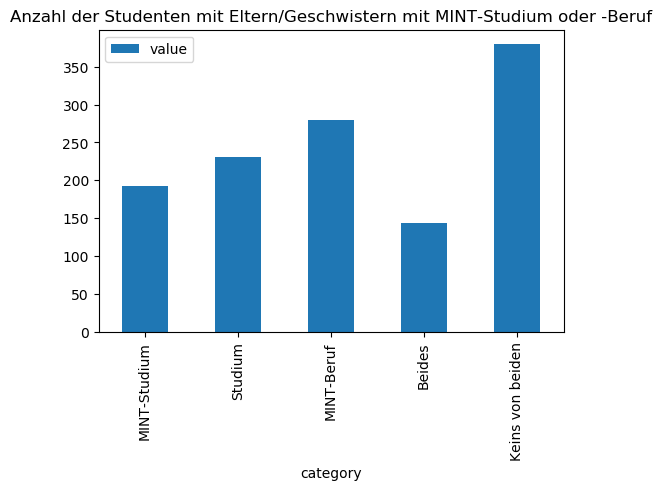

In [9]:
txa_plot(mint_in_family_df, title ='Anzahl der Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf')

## Alle Studenten mit Trennung

In [10]:
study_family_mint_df = study_family_df[study_family_df["MINTFach"] == "ja"]
normal_study_family_mint_df = normal_study_family_df[normal_study_family_df["MINTFach"] == "ja"]
job_family_mint_df = job_family_df[job_family_df["MINTFach"] == "ja"]
study_and_job_mint_df = study_and_job_df[study_and_job_df["MINTFach"] == "ja"]
no_study_and_job_mint_df = no_study_and_job_df[no_study_and_job_df["MINTFach"] == "ja"]

study_family_no_mint_df = study_family_df[study_family_df["MINTFach"] == "nein"]
normal_study_family_no_mint_df = normal_study_family_df[normal_study_family_df["MINTFach"] == "nein"]
job_family_no_mint_df = job_family_df[job_family_df["MINTFach"] == "nein"]
study_and_job_no_mint_df = study_and_job_df[study_and_job_df["MINTFach"] == "nein"]
no_study_and_job_no_mint_df = no_study_and_job_df[no_study_and_job_df["MINTFach"] == "nein"]

In [11]:
index = ["MINT-Studium", "Studium", "MINT-Beruf", "Beides", "Keins von beiden"]
mint_values = [len(study_family_mint_df), len(normal_study_family_mint_df), len(job_family_mint_df), len(study_and_job_mint_df), len(no_study_and_job_mint_df)]
no_mint_values = [len(study_family_no_mint_df), len(normal_study_family_no_mint_df), len(job_family_no_mint_df), len(study_and_job_no_mint_df), len(no_study_and_job_no_mint_df)]

mint_in_family_split_df = pd.DataFrame({'MINT-Student':mint_values, 'Nicht MINT-Student':no_mint_values}, index = index)
mint_in_family_split_df

,MINT-Student,Nicht MINT-Student
MINT-Studium,123,70
Studium,129,102
MINT-Beruf,185,95
Beides,94,50
Keins von beiden,216,164


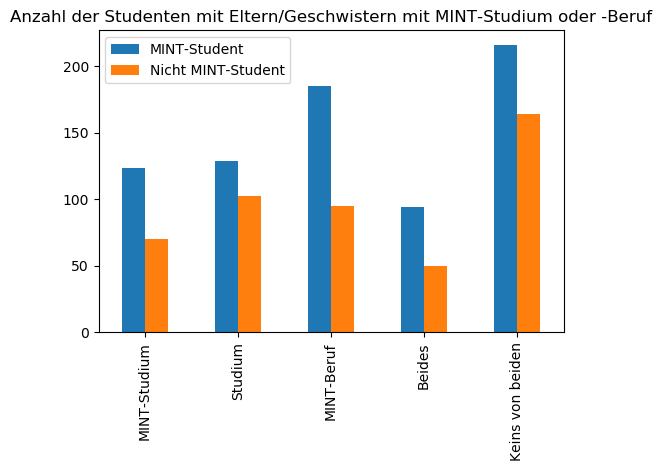

In [12]:
mint_in_family_split_df.plot(kind='bar', figsize=(6, 4), title="Anzahl der Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf")

## MINT-Studenten

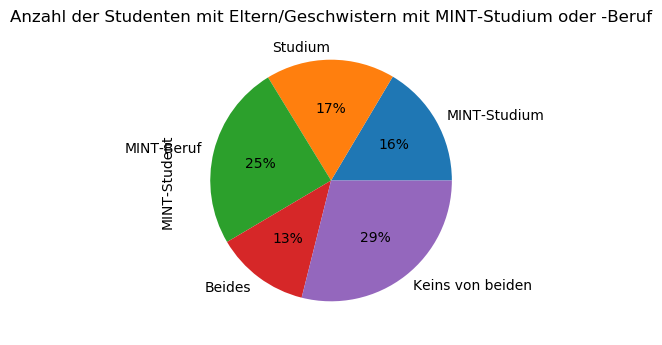

In [13]:
mint_in_family_split_df["MINT-Student"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Anzahl der Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf")

In [14]:
study_mint_female_df = study_family_mint_df[study_family_mint_df["Geschlecht"] == "Weiblich"]
normal_study_mint_female_df = normal_study_family_mint_df[normal_study_family_mint_df["Geschlecht"] == "Weiblich"]
job_mint_female_df = job_family_mint_df[job_family_mint_df["Geschlecht"] == "Weiblich"]
study_and_job_mint_female_df = study_and_job_mint_df[study_and_job_mint_df["Geschlecht"] == "Weiblich"]
no_study_and_job_mint_female_df = no_study_and_job_mint_df[no_study_and_job_mint_df["Geschlecht"] == "Weiblich"]

index = ["MINT-Studium", "Studium", "MINT-Beruf", "Beides", "Keins von beiden"]
mint_values = [len(study_mint_female_df), len(normal_study_mint_female_df), len(job_mint_female_df), len(study_and_job_mint_female_df), len(no_study_and_job_mint_female_df)]

mint_female_split_df = pd.DataFrame({'MINT-Student':mint_values}, index = index)
mint_female_split_df

,MINT-Student
MINT-Studium,56
Studium,41
MINT-Beruf,88
Beides,46
Keins von beiden,72


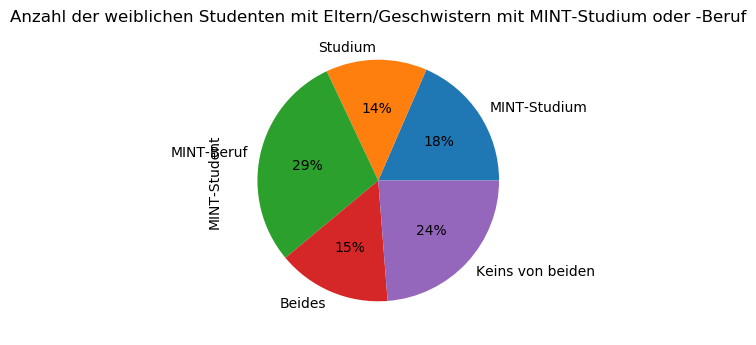

In [15]:
mint_female_split_df["MINT-Student"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Anzahl der weiblichen Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf")

## Nicht MINT-Studenten

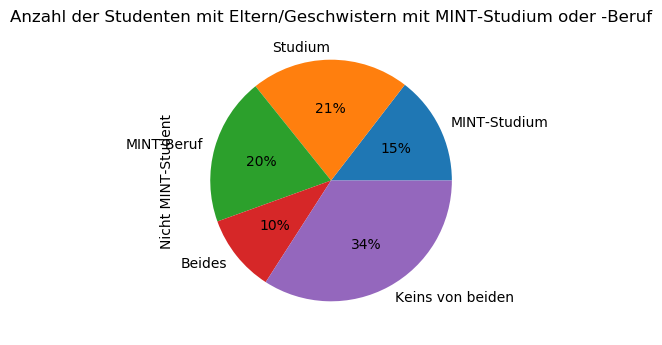

In [16]:
mint_in_family_split_df["Nicht MINT-Student"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Anzahl der Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf")

In [17]:
study_no_mint_female_df = study_family_no_mint_df[study_family_no_mint_df["Geschlecht"] == "Weiblich"]
normal_study_no_mint_female_df = normal_study_family_no_mint_df[normal_study_family_no_mint_df["Geschlecht"] == "Weiblich"]
job_no_mint_female_df = job_family_no_mint_df[job_family_no_mint_df["Geschlecht"] == "Weiblich"]
study_and_job_no_mint_female_df = study_and_job_no_mint_df[study_and_job_no_mint_df["Geschlecht"] == "Weiblich"]
no_study_and_job_no_mint_female_df = no_study_and_job_no_mint_df[no_study_and_job_no_mint_df["Geschlecht"] == "Weiblich"]

no_mint_values = [len(study_no_mint_female_df), len(normal_study_no_mint_female_df), len(job_no_mint_female_df), len(study_and_job_no_mint_female_df), len(no_study_and_job_no_mint_female_df)]

index = ["MINT-Studium", "Studium", "MINT-Beruf", "Beides", "Keins von beiden"]

no_mint_female_split_df = pd.DataFrame({'Nicht MINT-Student':no_mint_values}, index = index)
no_mint_female_split_df

,Nicht MINT-Student
MINT-Studium,57
Studium,74
MINT-Beruf,79
Beides,40
Keins von beiden,122


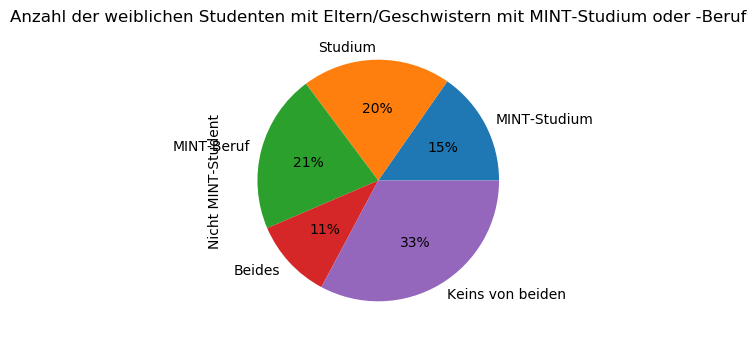

In [18]:
no_mint_female_split_df["Nicht MINT-Student"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Anzahl der weiblichen Studenten mit Eltern/Geschwistern mit MINT-Studium oder -Beruf")

## Fazit

**These 1: Frauen aus hochschulfernen Schichten studieren weniger häufig Männerfächer**

Bei MINT-Studenten:
- 18% haben Eltern/Geschwister die ein MINT-Fach studiert haben
- 14% haben Eltern/Geschwister die studiert haben
- 15% haben Eltern/Geschwister die ein MINT-Fach studiert haben und einen MINT-Beruf ausüben

Bei nicht MINT-Studenten:
- 15% haben Eltern/Geschwister die ein MINT-Fach studiert haben
- 20% haben Eltern/Geschwister die studiert haben
- 11% haben Eltern/Geschwister die ein MINT-Fach studiert haben und einen MINT-Beruf ausüben

Daraus lässt sich ableiten, dass diese These weder auf MINT- noch auf nicht MINT-Studenten mehrheitlich zutrifft.Dabei haben 47% der MINT-Studenten und 46% der nicht MINT-Studenten Eltern oder Geschwister, die ein beliebiges Fach (MINT oder nicht MINT) studiert haben.

**These 2: Viele Studenten wählen oft einen ähnlichen Beruf wie ihre Eltern**

Bei MINT-Studenten:
- 16% haben Eltern/Geschwister die ein MINT-Fach studiert haben
- 25% haben Eltern/Geschwister die einen MINT-Beruf ausüben
- 13% haben sogar beides

Bei nicht MINT-Studenten:
- 15% haben Eltern/Geschwister die ein MINT-Fach studiert haben
- 20% haben Eltern/Geschwister die einen MINT-Beruf ausüben
- 10% haben sogar beides

Daraus lässt sich ableiten, dass die zweite These eher bei MINT- als bei nicht MINT-Studenten zutrifft. Dabei haben prozentual 54% aller MINT-Studenten und 45% aller nicht MINT-Studenten einen Beruf der dem der Eltern ähnlich ist (bezogen auf MINT und nicht MINT).

# Familie vs Karriere

In vielen Fällen müssen sich Frauen entweder für eine Familiengründung oder eine Karriere entscheiden.
Daher soll im folgenden ermittelt werden für wie sich die Prioritäten der MINT- und nicht MINT-Studentinnen verteilen.

## Alle Studentinnen

In [131]:
female_df = poll_df[poll_df["Geschlecht"] == "Weiblich"]

partner_children_df = female_df[((female_df["Partner"] == "2") | (female_df["Partner"] == "1"))
                                & ((female_df["Kinder"] == "2") | (female_df["Kinder"] == "1"))]

partner_career_df = female_df[((female_df["Partner"] == "2") | (female_df["Partner"] == "1"))
                              & ((female_df["Karriere"] == "2") | (female_df["Karriere"] == "1"))]

everything_df = female_df[((female_df["Partner"] == "2") | (female_df["Partner"] == "1"))
                            & ((female_df["Kinder"] == "2") | (female_df["Kinder"] == "1"))
                            & ((female_df["Karriere"] == "2") | (female_df["Karriere"] == "1"))]

nothing_df = female_df[((female_df["Partner"] == "4") | (female_df["Partner"] == "3"))
                            & ((female_df["Kinder"] == "4") | (female_df["Kinder"] == "3"))
                            & ((female_df["Karriere"] == "4") | (female_df["Karriere"] == "3"))]

id_list = partner_children_df["AntwortID"]
id_list = id_list.append(partner_career_df["AntwortID"])
id_list = id_list.append(everything_df["AntwortID"])
id_list = id_list.append(nothing_df["AntwortID"])

partner_df = female_df[((female_df["Partner"] == "2") | (female_df["Partner"] == "1"))
                       & ~(female_df["AntwortID"].isin(id_list))]
children_df = female_df[((female_df["Kinder"] == "2") | (female_df["Kinder"] == "1"))
                       & ~(female_df["AntwortID"].isin(id_list))]
career_df = female_df[((female_df["Karriere"] == "2") | (female_df["Karriere"] == "1"))
                     & ~(female_df["AntwortID"].isin(id_list))]

In [132]:
family_career_dict = {'category':["Partner", "Kinder", "Karriere", "Partner & Kinder", 
                                  "Partner & Karriere", "Alles wichtig", "Alles unwichtig"],
                  'value':[len(partner_df), len(children_df), len(career_df),
                           len(partner_children_df), len(partner_career_df),
                           len(everything_df), len(nothing_df)]}

family_career_df = pd.DataFrame(family_career_dict)
family_career_df

,category,value
0,Partner,7
1,Kinder,79
2,Karriere,108
3,Partner & Kinder,18
4,Partner & Karriere,12
5,Alles wichtig,9
6,Alles unwichtig,179


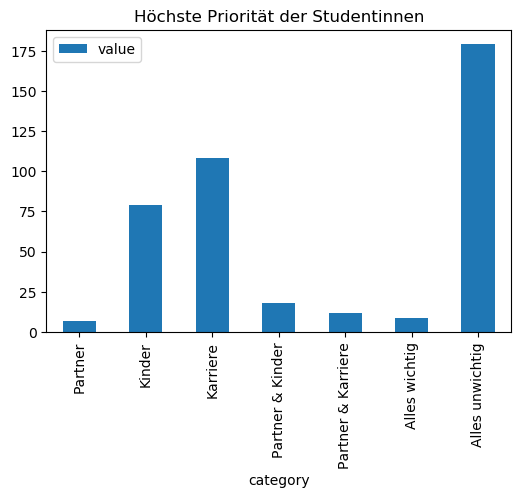

In [133]:
txa_plot(family_career_df, title ='Höchste Priorität der Studentinnen')

## Alle Studentinnen mit Trennung

In [134]:
mint_partner_df = partner_df[partner_df["MINTFach"] == "ja"]
mint_children_df = children_df[children_df["MINTFach"] == "ja"]
mint_career_df = career_df[career_df["MINTFach"] == "ja"]

mint_partner_children_df = partner_children_df[partner_children_df["MINTFach"] == "ja"]
mint_partner_career_df = partner_career_df[partner_career_df["MINTFach"] == "ja"]
mint_everything_df = everything_df[everything_df["MINTFach"] == "ja"]
mint_nothing_df = nothing_df[nothing_df["MINTFach"] == "ja"]



no_mint_partner_df = partner_df[partner_df["MINTFach"] == "nein"]
no_mint_children_df = children_df[children_df["MINTFach"] == "nein"]
no_mint_career_df = career_df[career_df["MINTFach"] == "nein"]

no_mint_partner_children_df = partner_children_df[partner_children_df["MINTFach"] == "nein"]
no_mint_partner_career_df = partner_career_df[partner_career_df["MINTFach"] == "nein"]
no_mint_everything_df = everything_df[everything_df["MINTFach"] == "nein"]
no_mint_nothing_df = nothing_df[nothing_df["MINTFach"] == "nein"]

In [137]:
index = ["Partner", "Kinder", "Karriere", "Partner & Kinder", 
        "Partner & Karriere", "Alles wichtig", "Alles unwichtig"]
mint_values = [len(mint_partner_df), len(mint_children_df), len(mint_career_df),
               len(mint_partner_children_df), len(mint_partner_career_df), len(mint_everything_df),
               len(mint_nothing_df)]
no_mint_values = [len(no_mint_partner_df), len(no_mint_children_df), len(no_mint_career_df),
               len(no_mint_partner_children_df), len(no_mint_partner_career_df), len(no_mint_everything_df),
               len(no_mint_nothing_df)]

family_career_split_df = pd.DataFrame({'MINT-Studentin':mint_values, 'Nicht MINT-Studentin':no_mint_values}, index = index)
family_career_split_df

,MINT-Studentin,Nicht MINT-Studentin
Partner,2,5
Kinder,36,43
Karriere,42,66
Partner & Kinder,7,11
Partner & Karriere,4,8
Alles wichtig,2,7
Alles unwichtig,81,98


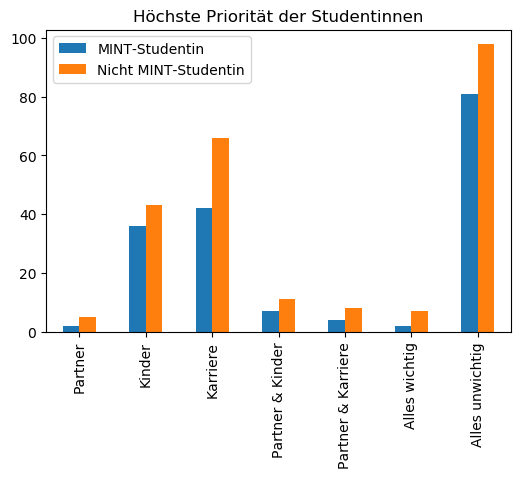

In [138]:
family_career_split_df.plot(kind='bar', figsize=(6, 4), title="Höchste Priorität der Studentinnen")

## MINT-Studentinnen

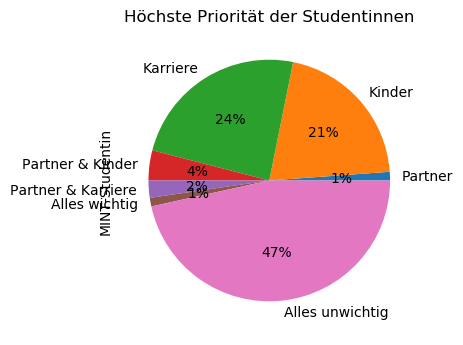

In [140]:
family_career_split_df["MINT-Studentin"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Höchste Priorität der Studentinnen")

## Nicht MINT-Studentinnen

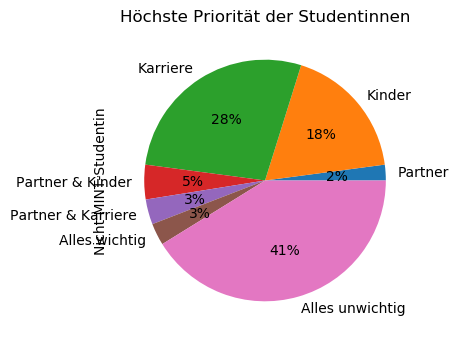

In [141]:
family_career_split_df["Nicht MINT-Studentin"].plot(autopct='%1.0f%%', kind='pie', figsize=(6, 4), title="Höchste Priorität der Studentinnen")